In [1]:
import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt

#downloading dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images, test_labels) = fmnist.load_data()

#normalizing pixel value 
training_images = training_images/255.0
test_images = test_images/255.0

In [12]:
#Define the model 
model = tf.keras.Sequential([

      #add convolution and max pooling
      keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
      keras.layers.MaxPooling2D(2,2),
      keras.layers.Conv2D(32,(3,3),activation='relu'),
      keras.layers.MaxPooling2D(2,2),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10,activation='softmax')

])

#print the model summary
model.summary()

#compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#callback funtion
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    ls = 0.25
    if logs.get('loss')<ls:
      print("loss is low,thus cancelling the training")
      self.model.stop_training = True

callbacks = myCallback()

#Train the model
print("\nModel training")
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

#Evaluating
print("\nModel Evaluating")
model.evaluate(test_images, test_labels)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

[0.29257673025131226, 0.8937000036239624]

In [13]:
#Visualizing the Convolution and Max Pooling 
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 26ms/step


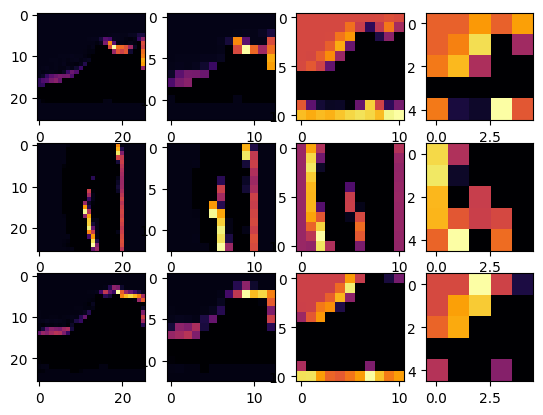

In [14]:

f,axarr = plt.subplots(3,4)

FIRST_IMG = 0
SECOND_IMG = 5
THIRD_IMG = 28
CONVOLUTION_NUMBER = 1

layer_output = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs= model.input, outputs = layer_output)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMG].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMG].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMG].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')
  axarr[2,x].grid(False)
